<a href="https://colab.research.google.com/github/Deepandreinforcement/Resim-Renklendirme/blob/main/ImageColorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Koda geçmeden ayarlardan GPU'yu seçtiğinizden emin olun. GPU'yu seçmek için Çalışma zamanına tkılayıp, çalışma zamanı türünü değiştir diyip Donanım Hızlandırıcı olarak GPU'yu seçeceksiniz. 

In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2567, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 2567 (delta 62), reused 185 (delta 56), pack-reused 2345
Receiving objects: 100% (2567/2567), 69.70 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (1143/1143), done.


In [ ]:
cd DeOldify

/content/DeOldify


In [ ]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [ ]:
!pip install -r requirements-colab.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 13.4 MB/s 
     |████████████████████████████████| 125 kB 75.1 MB/s 
     |████████████████████████████████| 2.8 MB 71.2 MB/s 
     |████████████████████████████████| 631 kB 64.8 MB/s 
     |████████████████████████████████| 355 kB 74.0 MB/s 
     |████████████████████████████████| 2.3 MB 75.8 MB/s 
     |████████████████████████████████| 106 kB 83.1 MB/s 
     |████████████████████████████████| 193 kB 82.2 MB/s 
     |████████████████████████████████| 357 kB 77.2 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654019 sha256=a798ada5e9cb4076b2fa820b4e264c92a5a9c7eb778daea897edb02e55e6c562
  Stored in directory: /root/.cache/pip/wheels/41/23/e8/b1016c275f713978d312621da3c4f55920ec4297798aba8a5a
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=af5892b8cb6922b4f135

In [ ]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


INFO:root:Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt


Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt


INFO:root:Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt


Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt


In [ ]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2022-12-12 17:32:55--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  14.9MB/s    in 18s     

2022-12-12 17:33:14 (13.7 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [ ]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also u

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

# Resmi Yükleme

In [ ]:
# resmi buraya yükleyip dosya yolunu kopyalayıp değişkene atıyoruz.
image_name='/content/classic_film.jpg'

Burada sonuç DeOldify klasörünün içinde belirtilen yere kaydediliyor

PosixPath('result_images/classic_film.jpg')

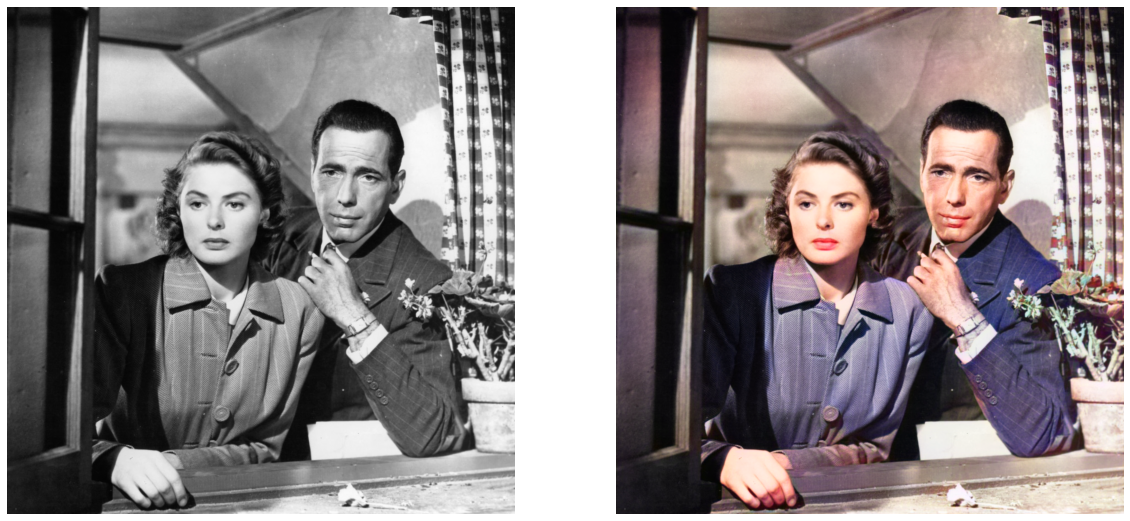

In [ ]:
colorizer.plot_transformed_image(image_name,render_factor=35,  compare=True, watermarked=False)

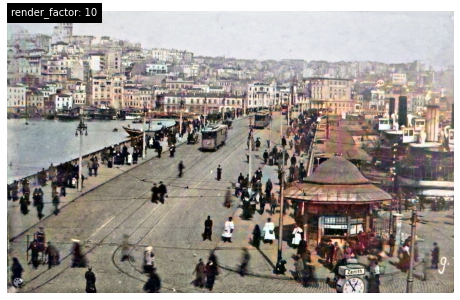

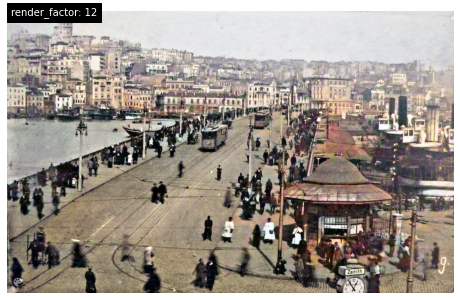

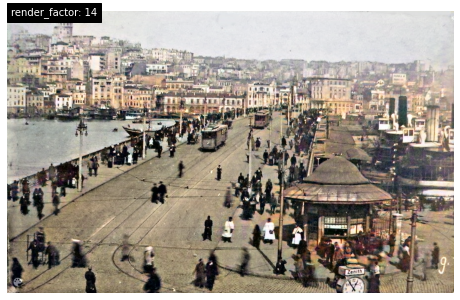

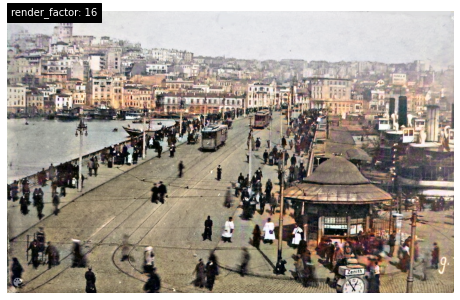

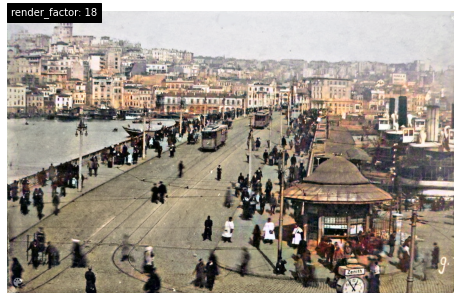

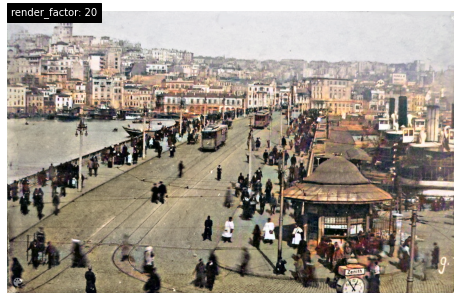

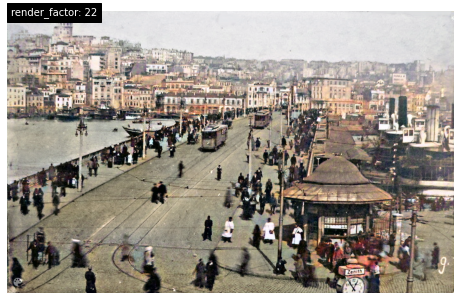

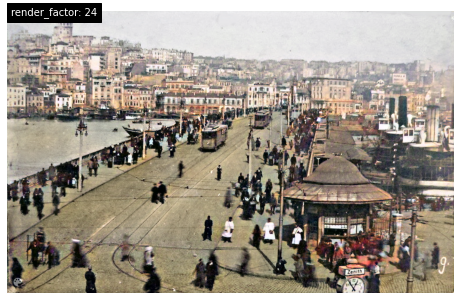

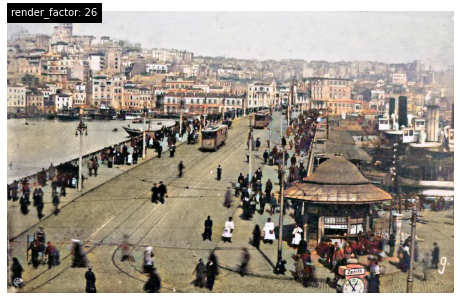

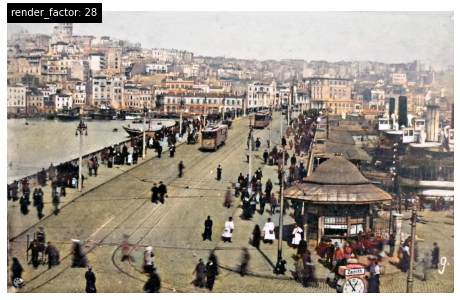

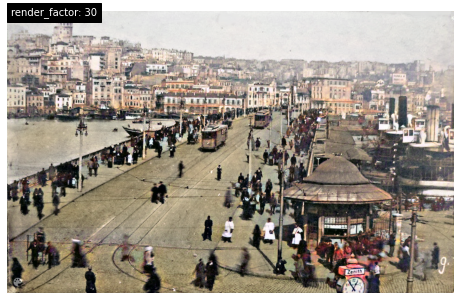

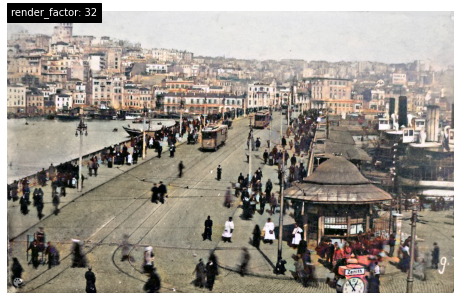

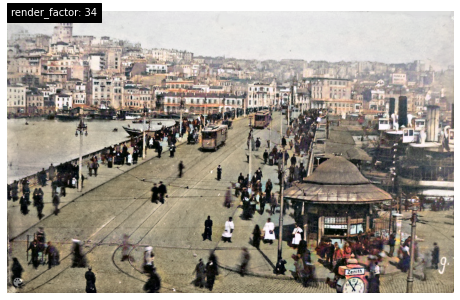

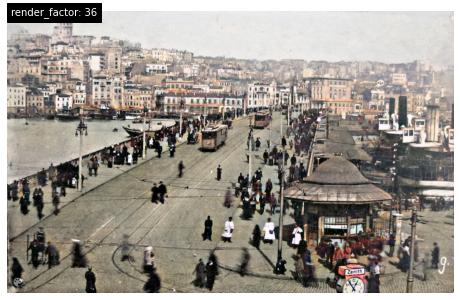

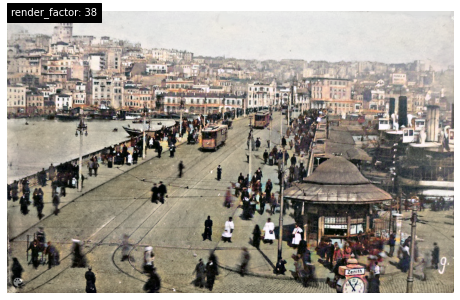

In [ ]:
# burada farklı render_factor değerleri için bir sonuç üretiliyor
for i in range(10,40,2):
    colorizer.plot_transformed_image('/content/1910lu-yillarda-galata-koprusu.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))